**SUDISH BASNET, 301250603**

Use python to create a 2D CNN classifier model that can identify different images in CIFAR-10 dataset. This dataset
consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and
10000 test images. More details about this dataset can be found in: https://www.cs.toronto.edu/~kriz/cifar.html


1) Import all the necessary libraries, read the dataset from Keras libraries using cifar10.load_data(). Normalize all the train
and test images by dividing with 255.0. Employ one hot encoding for class labels in the train and test data. [15% marks].


In [66]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [67]:
#load dataset
cdata = cifar10.load_data()

In [68]:
#pre-shuffled train data and test data
(x_train,y_train),(x_test,y_test) = cdata
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [69]:
#Normalize the data dimensions so that they are of approximately the same scale.
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [70]:
# Further break training data into train / validation sets
(x_train,x_valid) = x_train[5000:],x_train[:5000]
(y_train,y_valid) = y_train[5000:],y_train[:5000]
print(x_train.shape,x_test.shape,x_valid.shape)
print(y_train.shape,y_test.shape,y_valid.shape)

(45000, 32, 32, 3) (10000, 32, 32, 3) (5000, 32, 32, 3)
(45000, 1) (10000, 1) (5000, 1)


In [71]:
# Reshape input data to (32, 32, 3) if not same
w, h = 32, 32
x_train = x_train.reshape(x_train.shape[0], w, h, 3)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 3)
x_test = x_test.reshape(x_test.shape[0], w, h, 3)
x_train = x_train.reshape(x_train.shape[0], w, h, 3)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 3)
x_test = x_test.reshape(x_test.shape[0], w, h, 3)

In [72]:
#save the original values of labels in other variables 
y_tr_org = np.copy(y_train)
y_val_org = np.copy(y_valid)
y_tst_org = np.copy(y_test)

In [73]:
# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

2) Build a 2D CNN classifier model using Sequential API having the following parameters: [25% marks].
• Three Conv2D layers
• Layer 1 has 32 neurons, input_shape= (32,32, 3)
• Layer 2 has 64 neurons
• Layer 3 has 128 neurons
• All Conv2D layers must use relu activation
• Use a kernel_size= (3,3) in all the Conv2D layers
• Three MaxPooling2D layers (pool_size=(2,2)), alternating with Conv2D layers
• Flatten layer is followed by a fully connected (Dense) layer with 128 neurons and relu activation
• This is followed by a Dropout with a value 0.2.
• The last Dense layer is the output layer which uses softmax activation


In [74]:
#Creating CNN classifier model with Sequential API and defining input shape in first layer
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               4194432   
                                                      

3) Compile the model using categorical crossentropy loss with Adam optimizer. The learning rate value must be 0.0001
and metric used is accuracy. [20% marks].


In [75]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

4) Train the model with batch_size=128, epochs=100. Display the curves of loss and accuracy during training. Check if the
model is overfitting or underfitting and comment on that in the colab notebook itself. Then save the model (in .h5 format)
using model.save. [20% marks].


In [76]:
checkpoint_c = keras.callbacks.ModelCheckpoint('CS_Toronto.h5',save_best_only=True)
history = model.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_valid,y_valid),callbacks=[checkpoint_c])

Epoch 1/100
352/352 [==============================] - 10s 24ms/step - loss: 1.7745 - accuracy: 0.3631 - val_loss: 1.4547 - val_accuracy: 0.4986
Epoch 2/100
352/352 [==============================] - 9s 25ms/step - loss: 1.4271 - accuracy: 0.4901 - val_loss: 1.2728 - val_accuracy: 0.5460
Epoch 3/100
352/352 [==============================] - 8s 23ms/step - loss: 1.2864 - accuracy: 0.5432 - val_loss: 1.1824 - val_accuracy: 0.5766
Epoch 4/100
352/352 [==============================] - 8s 23ms/step - loss: 1.1917 - accuracy: 0.5762 - val_loss: 1.1089 - val_accuracy: 0.6108
Epoch 5/100
352/352 [==============================] - 8s 23ms/step - loss: 1.1129 - accuracy: 0.6099 - val_loss: 1.0734 - val_accuracy: 0.6248
Epoch 6/100
352/352 [==============================] - 8s 23ms/step - loss: 1.0450 - accuracy: 0.6349 - val_loss: 1.0492 - val_accuracy: 0.6322
Epoch 7/100
352/352 [==============================] - 8s 23ms/step - loss: 0.9856 - accuracy: 0.6555 - val_loss: 0.9781 - val_accuracy

In [77]:
#saving model for further referencing
model.save('toronto_model.h5')
model.save_weights('toronto_weights.ckpt')

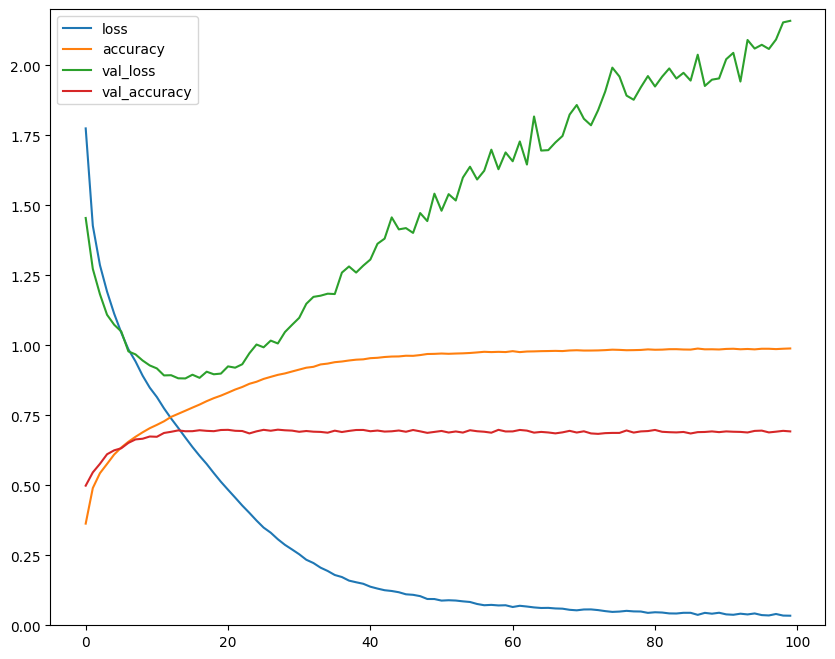

In [78]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid = True
plt.gca().set_ylim(0,2.2)
plt.show()

In [79]:
#Since the training loss is likely 0 at 100 epochs but validation loss is just opposite and having so much difference in accuracy, the model is overfit

5) Evaluate the model on test data using several evaluation metrics such as accuracy, precision, and recall. Make a
comparison of AUC values for each class depicted through an ROC graph. [20% marks]

In [81]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
img_classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_pred_prob = np.max(predictions, 1)
print(classification_report(y_tst_org, y_pred, target_names=img_classes))


Classification Report

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

    airplane       0.72      0.73      0.73      1000
  automobile       0.81      0.80      0.80      1000
        bird       0.60      0.51      0.55      1000
         cat       0.47      0.56      0.51      1000
        deer       0.62      0.68      0.65      1000
         dog       0.58      0.58      0.58      1000
        frog       0.74      0.76      0.75      1000
       horse       0.78      0.70      0.74      1000
        ship       0.78      0.81      0.79      1000
       truck       0.80      0.73      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.69     10000
weighted avg       0.69      0.68      0.69     10000



In [83]:
#Overall scores for the model
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_tst_org, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_tst_org, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_tst_org, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_tst_org, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_tst_org, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_tst_org, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_tst_org, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_tst_org, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_tst_org, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_tst_org, y_pred, average='weighted')))


Accuracy: 0.68

Micro Precision: 0.68
Micro Recall: 0.68
Micro F1-score: 0.68

Macro Precision: 0.69
Macro Recall: 0.68
Macro F1-score: 0.69

Weighted Precision: 0.69
Weighted Recall: 0.68
Weighted F1-score: 0.69


313/313 [==============================] - 1s 3ms/step


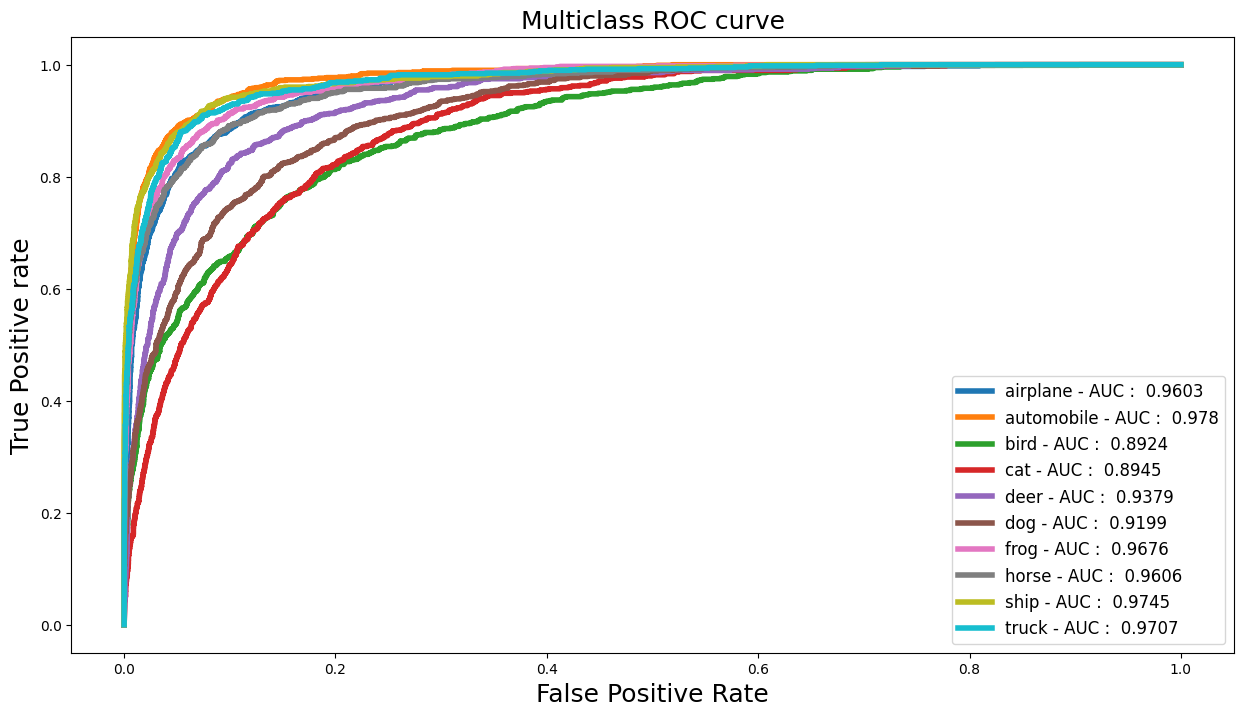

In [99]:
#ROC curve for individual classes
#set the figure size
figure = plt.figure(figsize=(15, 8))
plt.title('Multiclass ROC curve',fontsize = 18)
plt.xlabel('False Positive Rate',fontsize = 18)
plt.ylabel('True Positive rate',fontsize = 18)

fpr= {}
tpr = {}
thres ={}
auc = {}
df = pd.DataFrame(y_test, columns = [f"class {i}" for i in range(10)])
pred_prob = model.predict(x_test) #predict the probabilities for each class

for i in range(10): # iterate through the classes 
    fpr[i], tpr[i], thres[i] = roc_curve(y_tst_org, pred_prob[:,i], pos_label=i) #call the roc_curve function
    auc[i] = np.round(roc_auc_score(df[f'class {i}'] ,pred_prob[:,i], multi_class="ovr"), 4)
    plt.plot(fpr[i], tpr[i],linewidth = 4, label=f"{img_classes[i]} - AUC :  {auc[i]}")
plt.legend(fontsize=12)
plt.show()


According to our model ROC - AUC values, the significance is very acceptable. Our model can classify automobile with AUC of 97.8%, moreover, our model is very good at classifying ship and truck afterwards. However, our model is less responsive towards bird with AUC of 89.24% and cat with 89.45%. Beside this it is doing an average for airplnae, deer, dog, and frog from overall perspective.